In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations

In [2]:
df = pd.read_excel("C:\\Users\\Bogdan\\OneDrive - University of Warwick\\Desktop\\Projects\\(GOV BONDS) Yield Curve Arbitrage\\Data\\Yields\\Yield.xlsx")
df["Date"] = pd.to_datetime(df["Date"])
df = df.set_index("Date")
df = df.asfreq(pd.infer_freq(df.index))
df = df.dropna()
df

,1 Mo,2 Mo,3 Mo,4 Mo,6 Mo,1 Yr,2 Yr,3 Yr,5 Yr,7 Yr,10 Yr,20 Yr,30 Yr
Date,,,,,,,,,,,,,
2022-10-01,3.594444,3.857778,4.132222,4.308889,4.485556,4.588889,4.465556,4.471111,4.277778,4.198889,4.117778,4.438889,4.228889
2022-11-01,3.867000,4.141500,4.323000,4.434000,4.611000,4.728000,4.503500,4.336000,4.055500,3.985500,3.891000,4.215500,3.999000
2022-12-01,3.899048,4.226667,4.358095,4.577143,4.708095,4.681905,4.288571,4.046667,3.764286,3.719048,3.616190,3.868095,3.659048
2023-01-01,4.518500,4.601500,4.687500,4.746500,4.803000,4.694000,4.207500,3.913000,3.643000,3.593500,3.531500,3.810500,3.664500
2023-02-01,4.639474,4.759474,4.787895,4.905789,4.965263,4.925263,4.533684,4.234211,3.942105,3.864211,3.746842,3.946316,3.802105
2023-03-01,4.494348,4.680000,4.858696,4.951739,4.993913,4.679130,4.302609,4.085217,3.823478,3.766087,3.663043,3.939130,3.770870
2023-04-01,4.171000,4.966500,5.073500,5.109000,4.992500,4.681000,4.016000,3.758000,3.537000,3.502000,3.460000,3.803000,3.684500
2023-05-01,5.493182,5.192273,5.308182,5.353636,5.266364,4.912727,4.131818,3.820455,3.591364,3.580909,3.573636,3.963636,3.855455
2023-06-01,5.200000,5.307143,5.415714,5.439524,5.420000,5.241429,4.639524,4.266667,3.949524,3.854762,3.748095,4.041905,3.867619


## 3 Mo and 1 Yr PCA

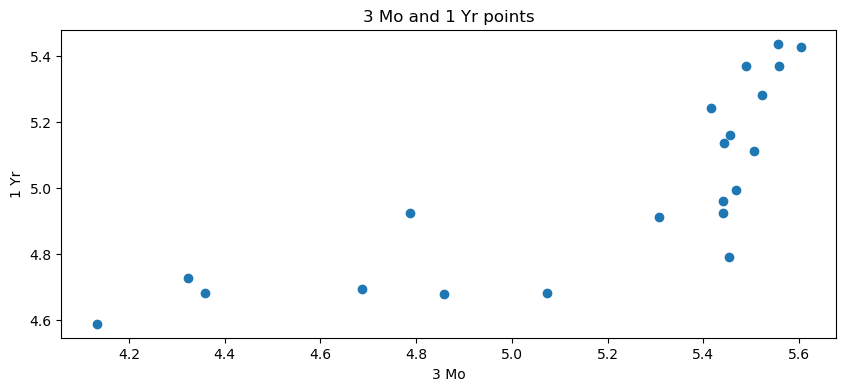

In [3]:
plt.figure(figsize=(10,4))
plt.plot(df["3 Mo"], df['1 Yr'], marker ='o', linestyle="")
Three_Mo = df['3 Mo']
One_Yr = df['1 Yr']
plt.title("3 Mo and 1 Yr points")
plt.xlabel("3 Mo")
plt.ylabel("1 Yr")
plt.show()

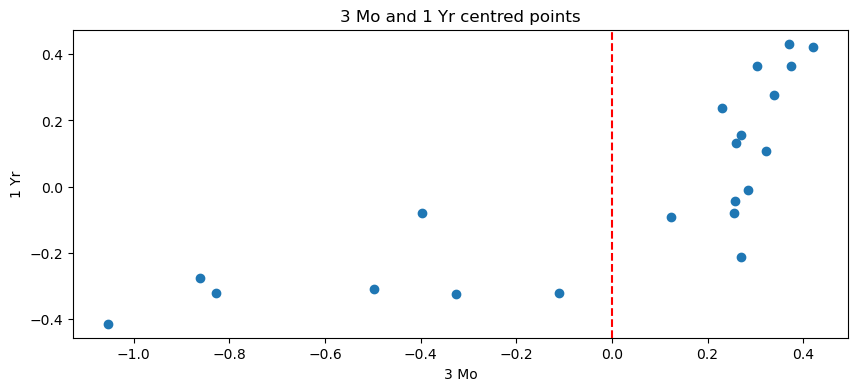

In [4]:
plt.figure(figsize=(10,4))
plt.plot(df['3 Mo'] - df['3 Mo'].mean(), df['1 Yr'] - df['1 Yr'].mean(), marker ='o', linestyle="") #decrease the averages from the x-axis and y-axis which centers the points
plt.title("3 Mo and 1 Yr centred points")
plt.xlabel("3 Mo")
plt.ylabel("1 Yr")
plt.axvline(0,color='r', linestyle="--")
plt.show()

## The PCA

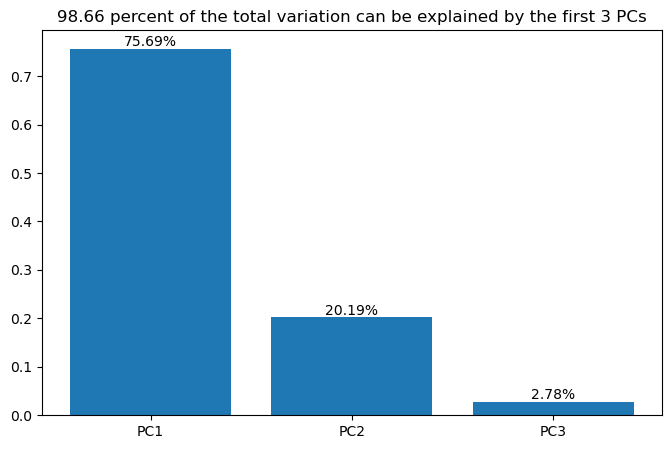

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

df = pd.read_excel("C:\\Users\\Bogdan\\OneDrive - University of Warwick\\Desktop\\Projects\\(GOV BONDS) Yield Curve Arbitrage\\Data\\Yields\\Yield.xlsx")
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index("Date")
df = df.dropna()

pca = PCA() #PCA is a class in which you can find the operations performed
pca.fit(df) #calculates the PCs of the data contained in df
explained_variance = pca.explained_variance_ratio_# array containing the proportion of variance associated with each principal component

# Scree plot for the top 3 PCs
plt.figure(figsize=(8, 5))
bars = plt.bar(range(1, 4), explained_variance[:3])
plt.xticks(range(1, 4), labels=[f'PC{i}' for i in range(1, 4)])
plt.title("98.66 percent of the total variation can be explained by the first 3 PCs")
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2%}', 
             ha='center', va='bottom', fontsize=10, color='black')

In [6]:
loadings = pca.components_[:3] #loads are the standardised coefficients of the linear combination giving the PC

feature_names = df.columns #get the names of the columns
pc1_loadings = loadings[0] #first PC row
pc2_loadings = loadings[1] #second PC row
pc3_loadings = loadings[2] #third PC row

loadings_df = pd.DataFrame({
    'Feature': feature_names,
    'PC1 Loading': pc1_loadings,
    'PC2 Loading': pc2_loadings,
    'PC3 Loading': pc3_loadings
})

# Sort the DataFrames by the absolute values of loadings in descending order
pc1_sorted = loadings_df.sort_values(by='PC1 Loading', key=abs, ascending=False) #key=abs means I don't care + or - just the abs value see Loadings for PC2
pc2_sorted = loadings_df.sort_values(by='PC2 Loading', key=abs, ascending=False)
pc3_sorted = loadings_df.sort_values(by='PC3 Loading', key=abs, ascending=False)

print("PC1")
print(pc1_sorted)
print()
print("PC2")
print(pc2_sorted)
print()
print("PC3")
print(pc3_sorted)


PC1
   Feature  PC1 Loading  PC2 Loading  PC3 Loading
0     1 Mo    -0.489525    -0.330779    -0.221191
1     2 Mo    -0.392000    -0.291795    -0.056537
2     3 Mo    -0.334839    -0.256580    -0.007773
3     4 Mo    -0.290445    -0.221349     0.082604
12   30 Yr    -0.242564     0.296064    -0.353973
4     6 Mo    -0.238004    -0.142181     0.236661
10   10 Yr    -0.236376     0.330524    -0.209381
11   20 Yr    -0.232301     0.320841    -0.275876
9     7 Yr    -0.218436     0.337598    -0.047905
8     5 Yr    -0.197679     0.337478     0.094560
5     1 Yr    -0.186553     0.013448     0.548176
6     2 Yr    -0.183283     0.215185     0.481938
7     3 Yr    -0.172392     0.310176     0.309424

PC2
   Feature  PC1 Loading  PC2 Loading  PC3 Loading
9     7 Yr    -0.218436     0.337598    -0.047905
8     5 Yr    -0.197679     0.337478     0.094560
0     1 Mo    -0.489525    -0.330779    -0.221191
10   10 Yr    -0.236376     0.330524    -0.209381
11   20 Yr    -0.232301     0.320841    -

## Want to **2 the loads and time by the PCs then add up to see how much is each factor accounting for the variance - this is what I thought (wrong/right ??)

In [7]:
loadings = pca.components_[:3]

feature_names = df.columns #get the names of the columns
pc1_loadings = loadings[0] **2 #weights of factors for PC1
pc2_loadings = loadings[1] **2 #weights of factors for PC2
pc3_loadings = loadings[2] **2 #weights of factors for PC3

loadings_df = pd.DataFrame({
    'Feature': feature_names,
    'PC1 Loading': pc1_loadings,
    'PC2 Loading': pc2_loadings,
    'PC3 Loading': pc3_loadings,
    "Overall impact (%)": (pc1_loadings*explained_variance[0] + pc2_loadings*explained_variance[1] + pc3_loadings*explained_variance[2])*100
})

factor_sorted = loadings_df.sort_values(by='Overall impact (%)', ascending=False)
print(factor_sorted)

   Feature  PC1 Loading  PC2 Loading  PC3 Loading  Overall impact (%)
0     1 Mo     0.239635     0.109415     0.048926           20.482421
1     2 Mo     0.153664     0.085144     0.003196           13.358332
2     3 Mo     0.112117     0.065833     0.000060            9.815144
3     4 Mo     0.084359     0.048995     0.006823            7.393050
12   30 Yr     0.058837     0.087654     0.125297            6.571523
10   10 Yr     0.055874     0.109246     0.043840            6.556609
11   20 Yr     0.053964     0.102939     0.076107            6.374466
9     7 Yr     0.047714     0.113972     0.002295            5.918916
8     5 Yr     0.039077     0.113891     0.008942            5.282038
4     6 Mo     0.056646     0.020215     0.056008            4.851311
7     3 Yr     0.029719     0.096209     0.095743            4.458202
6     2 Yr     0.033593     0.046304     0.232265            4.123544
5     1 Yr     0.034802     0.000181     0.300497            3.473633


## MOVING ON TO FORECASTING

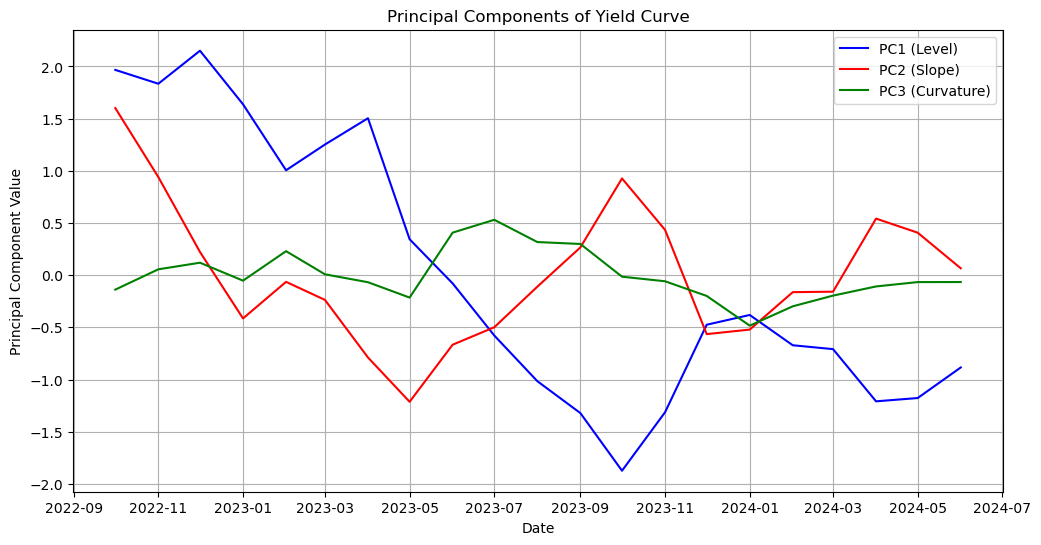

In [8]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = pd.read_excel("C:\\Users\\Bogdan\\OneDrive - University of Warwick\\Desktop\\Projects\\(GOV BONDS) Yield Curve Arbitrage\\Data\\Yields\\Yield.xlsx")
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index("Date")
df=df.dropna()

pca = PCA(n_components=3)  # Capture top 3 PCs
principal_components = pca.fit_transform(df)


pc_df = pd.DataFrame(principal_components, index=df.index, columns=['PC1', 'PC2', 'PC3']) # this is a DataFrame with values of the principal components over the days I have data on

plt.figure(figsize=(12, 6))
plt.plot(pc_df.index, pc_df['PC1'], label='PC1 (Level)', color='blue')
plt.plot(pc_df.index, pc_df['PC2'], label='PC2 (Slope)', color='red')
plt.plot(pc_df.index, pc_df['PC3'], label='PC3 (Curvature)', color='green')
plt.title('Principal Components of Yield Curve')
plt.xlabel('Date')
plt.ylabel('Principal Component Value')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
pc_df

,PC1,PC2,PC3
Date,,,
2022-10-01,1.966385,1.600728,-0.138704
2022-11-01,1.833867,0.939690,0.055934
2022-12-01,2.150120,0.221957,0.119125
2023-01-01,1.636995,-0.414734,-0.052758
2023-02-01,1.004959,-0.064179,0.229745
2023-03-01,1.251175,-0.237053,0.008042
2023-04-01,1.503366,-0.788756,-0.067797
2023-05-01,0.343957,-1.213180,-0.214912
2023-06-01,-0.079358,-0.666391,0.407321


In [10]:
from statsmodels.tsa.stattools import adfuller
def check_stationarity(series, name):
    result = adfuller(series)
    print(f'{name} p-value: {result[1]:.4f}')
    if result[1] < 0.05:
        print(f'{name} is likely stationary.')
    else:
        print(f'{name} is likely non-stationary.')
    print('')

check_stationarity(pc_df['PC1'], 'PC1')
check_stationarity(pc_df['PC2'], 'PC2')
check_stationarity(pc_df['PC3'], 'PC3')

PC1 p-value: 0.4956
PC1 is likely non-stationary.

PC2 p-value: 0.0000
PC2 is likely stationary.

PC3 p-value: 0.7582
PC3 is likely non-stationary.



## 1. Interest rates often exhibit mean-reverting behavior, particularly the spread between short-term and long-term rates (so PC2's mean is ct)

In [11]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

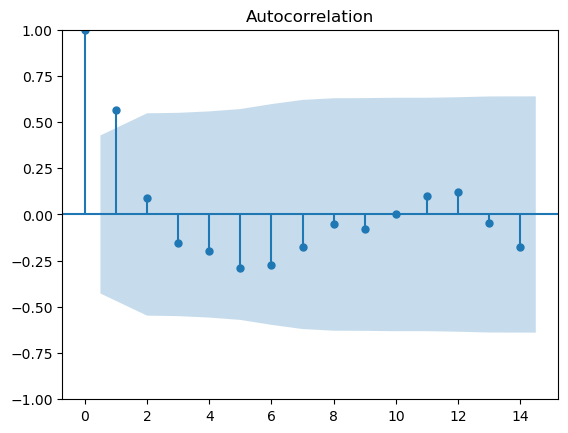

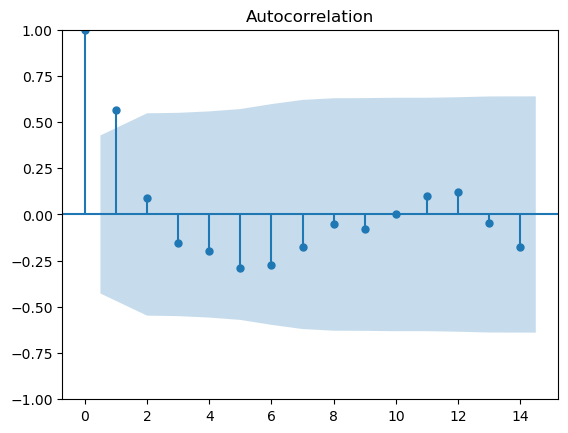

In [12]:
plot_acf(pc_df['PC2'])

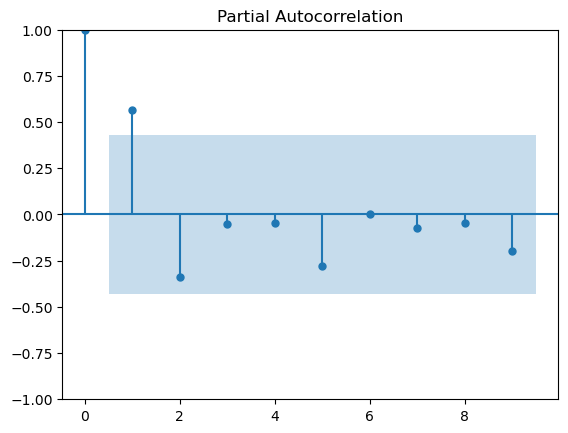

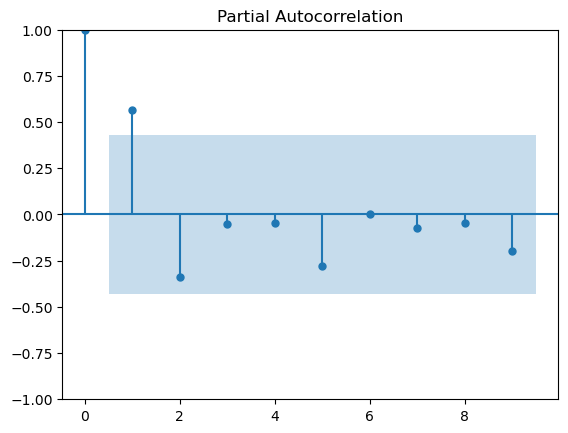

In [13]:
plot_pacf(pc_df['PC2'],lags=9)

## You can not use time series on the PCs themselves becasue you'd contradict the EMH (basically you can not predict based on past info, past info was priced in, it is just the new info that moves the needle). In other words the PC time series are random walks.

In [14]:
pc_df_diff = pc_df[['PC1', 'PC3']].diff().dropna()
pc_df_diff

,PC1,PC3
Date,,
2022-11-01,-0.132517,0.194639
2022-12-01,0.316253,0.063191
2023-01-01,-0.513125,-0.171883
2023-02-01,-0.632036,0.282503
2023-03-01,0.246217,-0.221703
2023-04-01,0.252191,-0.075839
2023-05-01,-1.159410,-0.147115
2023-06-01,-0.423315,0.622233
2023-07-01,-0.499212,0.122989


In [15]:
check_stationarity(pc_df_diff['PC1'], 'PC1.diff')
check_stationarity(pc_df_diff['PC3'], 'PC3.diff')

PC1.diff p-value: 0.0127
PC1.diff is likely stationary.

PC3.diff p-value: 0.2912
PC3.diff is likely non-stationary.



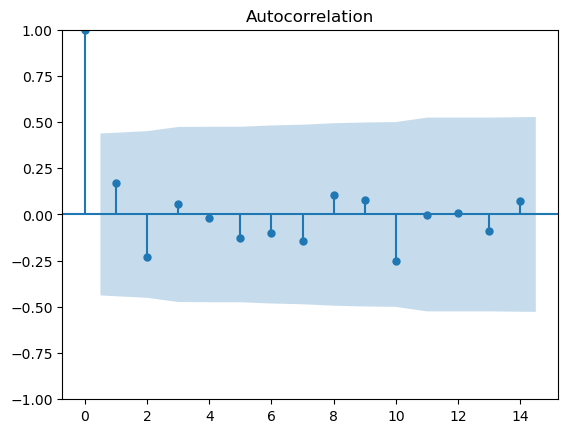

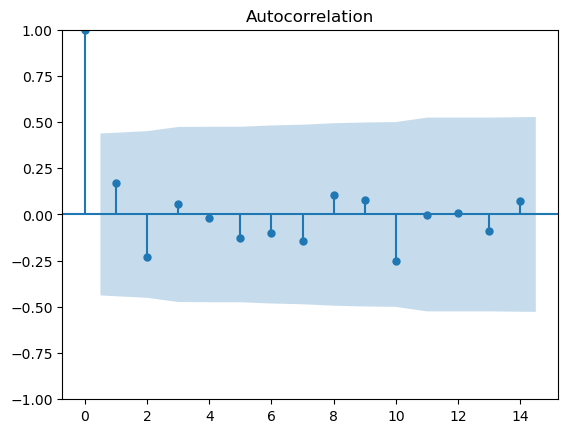

In [16]:
plot_acf(pc_df_diff['PC1'])

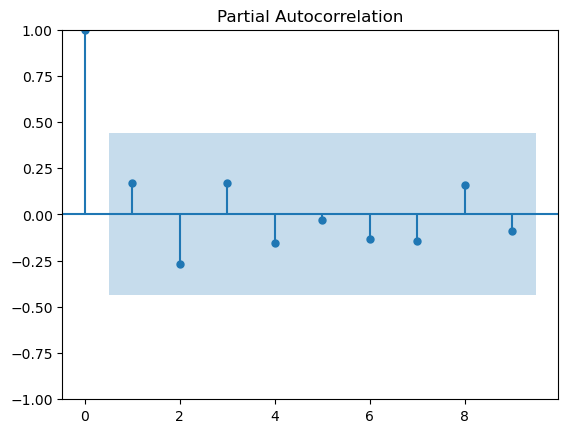

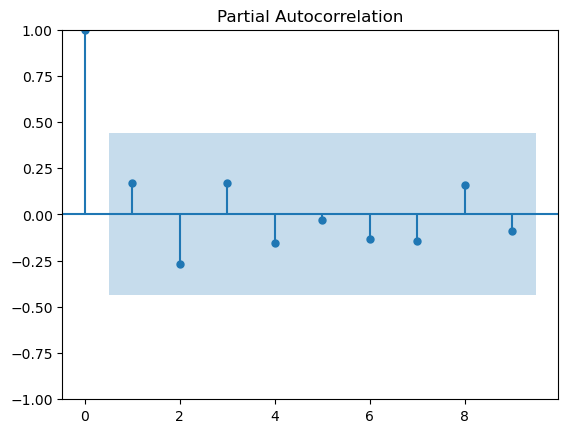

In [17]:
plot_pacf(pc_df_diff['PC1'], lags=9)

## PC1 first diff -> ARIMA(0,1,0) = a random walk (supports the above EMH claim)
## PC3 first diff is still not stationary. I also couldn't model PC3 by using macro stuff in a regression.

In [18]:
mean_yield_curve = np.array(df.mean()) #need the mean of each maturity
print(mean_yield_curve)

[5.04536704 5.13739921 5.18501501 5.22278949 5.19974767 5.00387966
 4.57948789 4.33979503 4.12036611 4.09505232 4.04362314 4.33067205
 4.17686069]


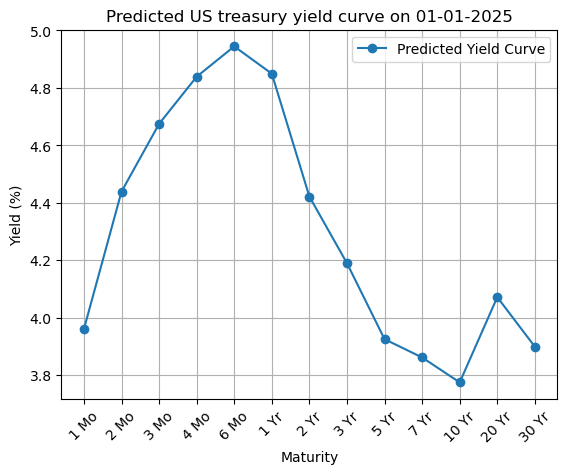

In [19]:
predicted_pcs = np.array([-4.4394, -0.19]) #values form the predicted values Excel file

reconstructed_yield_curve = predicted_pcs[0] * pc1_loadings + predicted_pcs[1] * pc2_loadings  # Contribution from PC1 & 2

reconstructed_yield_curve += mean_yield_curve #because u centred points this is basically a list of the values of the yields that are predicted for each maturity

maturities = df.columns

plt.plot(maturities, reconstructed_yield_curve, marker='o', label='Predicted Yield Curve')
plt.title('Predicted US treasury yield curve on 01-01-2025')
plt.xlabel('Maturity')
plt.ylabel('Yield (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

## Interpolate to make it smooth (visualy pleasing but not helpful)

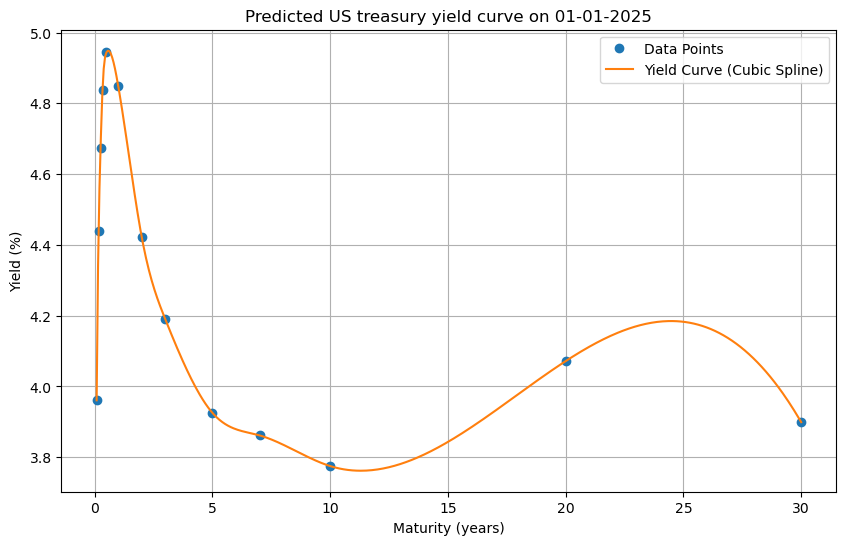

In [20]:
from scipy.interpolate import CubicSpline

maturities = np.array([1/12, 2/12, 3/12, 4/12, 6/12, 1, 2, 3, 5, 7, 10, 20, 30])  # Maturities in years

cs = CubicSpline(maturities, reconstructed_yield_curve) #creates polynomials for each interval between the observed points and I mean it derives the parameters and all so basically the intervals are modelled as the result of a polynomial specific to the interval

maturities_smooth = np.linspace(min(maturities), max(maturities), 500) #create 500 points between the two values and these points are equally spaced
reconstructed_yields_smooth = cs(maturities_smooth) #pass the points and interpolate them for their respective values

plt.figure(figsize=(10, 6))
plt.plot(maturities, reconstructed_yield_curve, 'o', label='Data Points') #'o' = circle
plt.plot(maturities_smooth, reconstructed_yields_smooth, '-', label='Yield Curve (Cubic Spline)') #plot the interpolated values
plt.title('Predicted US treasury yield curve on 01-01-2025')
plt.xlabel('Maturity (years)')
plt.ylabel('Yield (%)')
plt.legend()
plt.grid(True)
plt.show()

## Compare to present

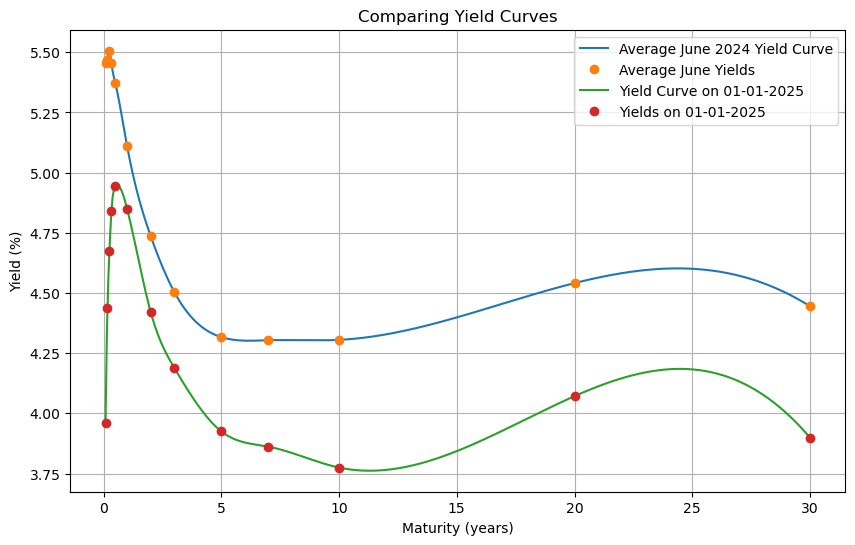

In [21]:
maturities = np.array([1/12, 2/12, 3/12, 4/12, 6/12, 1, 2, 3, 5, 7, 10, 20, 30])
latest_date = df.index.max()
yields_latest = np.array(df.loc[latest_date])#average June monthly yields
cs = CubicSpline(maturities, yields_latest)
maturities_smooth = np.linspace(min(maturities), max(maturities), 500)
yields_smooth = cs(maturities_smooth)

plt.figure(figsize=(10, 6))
plt.plot(maturities_smooth, yields_smooth, label="Average June 2024 Yield Curve")
plt.plot(maturities, yields_latest, 'o', label='Average June Yields')
plt.plot(maturities_smooth, reconstructed_yields_smooth, '-', label='Yield Curve on 01-01-2025')
plt.plot(maturities, reconstructed_yield_curve, 'o', label='Yields on 01-01-2025')
plt.title('Comparing Yield Curves')
plt.xlabel('Maturity (years)')
plt.ylabel('Yield (%)')
plt.legend()
plt.grid(True)
plt.show()

## Butterfly on the treasuries.

In [22]:
def percentage_change(array1, array2):
    return [(new - old) / old * 100 for old, new in zip(array1, array2)] #zip creates tuples of the piecewise elements of the 2 arrays (1mo array1, 1mo array2),(,)... thne loops over the tuples

array1 = yields_latest #the avg June 2024 yields
array2 = reconstructed_yield_curve # the 01 January 2025 predicted yields

result = percentage_change(array1, array2)
print(result) #give me the % change for all maturities

[-27.409921666151014, -18.831809469716823, -15.101587926454, -11.297053505148009, -7.9519657531729875, -5.110655695569137, -6.655968844788752, -6.996108016865449, -9.071314215289817, -10.27283503322597, -12.320798688686033, -10.339136357149982, -12.278152156751995]


In [23]:
maturities = np.array([1/12, 2/12, 3/12, 4/12, 6/12, 1, 2, 3, 5, 7, 10, 20, 30])
result = np.array(result)

yield_changes_in_percentage = pd.DataFrame({
    'Maturity': maturities,
    'Percentage Change in Yield (%)': result
})

#yield_changes_in_percentage_sorted = yield_changes_in_percentage.sort_values(by='Percentage Change in Yield (%)', ascending=True)

#yield_changes_in_percentage_sorted
yield_changes_in_percentage

,Maturity,Percentage Change in Yield (%)
0,0.083333,-27.409922
1,0.166667,-18.831809
2,0.250000,-15.101588
3,0.333333,-11.297054
4,0.500000,-7.951966
5,1.000000,-5.110656
6,2.000000,-6.655969
7,3.000000,-6.996108
8,5.000000,-9.071314
9,7.000000,-10.272835


In [24]:
min_value = float('inf')  # +infinity
best_combination = None

# Iterate over all combinations of three distinct indices from the DataFrame
for i, j, k in combinations(yield_changes_in_percentage.index, 3):
    # Check if the maturities are in the required order
    if yield_changes_in_percentage.loc[i, 'Maturity'] < yield_changes_in_percentage.loc[j, 'Maturity'] < yield_changes_in_percentage.loc[k, 'Maturity']:
        # Calculate the expression for the current combination
        a = yield_changes_in_percentage.loc[i, 'Percentage Change in Yield (%)']
        b = yield_changes_in_percentage.loc[j, 'Percentage Change in Yield (%)']
        c = yield_changes_in_percentage.loc[k, 'Percentage Change in Yield (%)']

        current_value = a - 2 * b + c
            
        # If the current value is less than the minimum found so far, update the minimum and the best combination
        if current_value < min_value:
            min_value = current_value
            best_combination = (a, b, c)

print(f"The best combination is {best_combination} with a minimized value of {min_value}")

The best combination is (-27.409921666151014, -5.110655695569137, -12.320798688686033) with a minimized value of -29.509408963698775


## Yield and price have an inverse relationship. So, I want to buy the 1 Mo, short the 1 Yr twice and buy the 10 Yr. The 1Mo/1Yr/10Yr is the optimal butterfly.